## Dataset
This dataset is used to classification models to predict students' dropout and academic sucess.<br>
I found it on [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).<br>
It is created from a higher education institution related to students enrolled in different undergraduate degrees and it consists of information known at the time of student enrollment and the students' academic performance at the end of the first and second semesters.<br>

## Data pre-processing

Since the delimter here is ";" instead of ","<br>
i use "<font color='red'>, sep=';'</font>" to read the .csv file

In [220]:
import pandas as pd

data_path = './data.csv'
data = pd.read_csv(data_path, sep=';')

data.head() # show first 5 data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Check dataset information

In [221]:
print(f'the dataset has {data.shape[0]} instances')
print(f'and {data.isnull().values.sum()} missing value')

the dataset has 4424 instances
and 0 missing value


Although there are a lot of features in the dataset as it is created for machine learning tasks. I just want to use some of them.

## Objectives
There is some thing I want to do:

1. Show the number of students who dropout / enrolled or graduate
2. Show the relationship between admission scores and graduation
3. Show the relationship between parent's qualification and graduation

### Objective 1

For the first objective, I use the following pseudocode:
1. Use value_counts() to get the number of each situation
2. Visualize with a pie chart

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


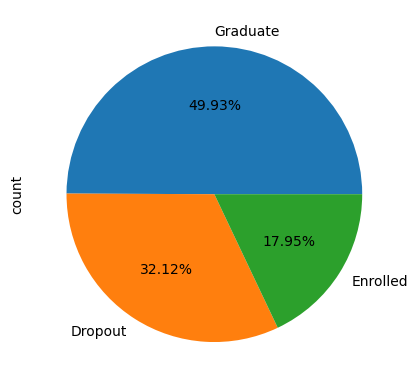

In [222]:
target_count = data['Target'].value_counts()
print(target_count)

plot = target_count.plot.pie(autopct='%.2f%%')

From the chart, we can see that there is nearly half of students successfully graduated.

### Objective 2

And for the second part:
1. Get admission scores and graduation from previous DataFrame
2. Use pd.concat() to combine them
2. Visualize with a box plot

   Admission grade    Target
0            127.3   Dropout
1            142.5  Graduate
2            124.8   Dropout
3            119.6  Graduate
4            141.5  Graduate


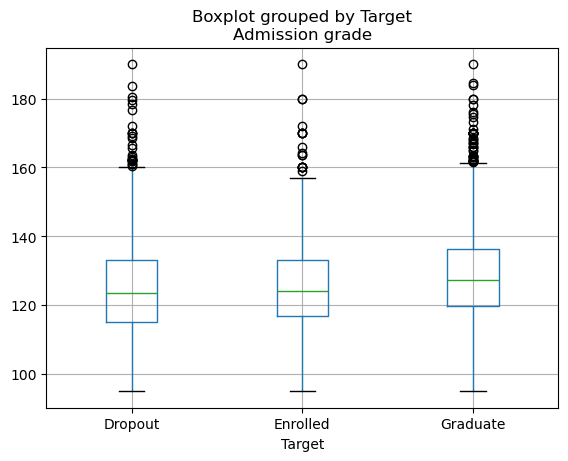

In [223]:
admission_scores = data['Admission grade']
targets = data['Target']

data_pair = pd.concat([admission_scores, targets], axis=1)
print(data_pair.head())

plot = data_pair.boxplot(column='Admission grade', by='Target')

We can see that the median (the green line) of "Graduate" is larger than the other situation<br>
Although there is a lot of outlier (the circle) in the three situations, it seems to be a correct judgment.<br>
We may need more data to get a more precise judgment.

### Objective 3

For the third part:
Since the range of the value of "Mother's qualification" and "Father's qualification" are difference and they are complicated, so I simplified them (see the cell below)
I use the following rule:
|Qualfication|Old value|New value|
|----|----|----|
|Can't read or write / Can read without having a 4th year of schooling|35, 36|0|
|Basic education|19, 37, 38|1|
|Junior high school|11, 26, 29, 30|2|
|Senior high school or non-higher-education|1, 9, 10, 12, 13, 14, 18, 20, 22, 25, 27, 31, 33, 39|3|
|Higher education|2, 3, 4, 5, 6, 40, 41, 42, 43, 44|4|
|Unknow|34|delete|

And the pseudocode is:
1. Create a new DataFrame consist of "Mother's qualification", "Father's qualification" and "Target"
2. Simplify the DataFrame with the above rules
3. Count the number of each education stages in another DataFrame
4. Visualize with a grouped bar plot
5. Selete the student's highest parent's qualification
6. Visualize with a grouped bar plot and a line chart

#### Mother's qualification:
|Value|Education Level|
|----|----|
|1|Secondary Education - 12th Year of Schooling or Eq.|
|2|Higher Education - Bachelor's Degree|
|3|Higher Education - Degree|
|4|Higher Education - Master's|
|5|Higher Education - Doctorate|
|6|Frequency of Higher Education|
|9|12th Year of Schooling - Not Completed|
|10|11th Year of Schooling - Not Completed|
|11|7th Year (Old)|
|12|Other - 11th Year of Schooling|
|14|10th Year of Schooling|
|18|General commerce course|
|19|Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.|
|22|Technical-professional course|
|26|7th year of schooling|
|27|2nd cycle of the general high school course|
|29|9th Year of Schooling - Not Completed |
|30|8th year of schooling|
|34|Unknown|
|35|Can't read or write|
|36|Can read without having a 4th year of schooling|
|37|Basic education 1st cycle (4th/5th year) or equiv.|
|38|Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.|
|39|Technological specialization course|
|40|Higher education - degree (1st cycle)|
|41|Specialized higher studies course|
|42|Professional higher technical course|
|43|Higher Education - Master (2nd cycle)|
|44|Higher Education - Doctorate (3rd cycle)|

#### Father's qualification:
|Value|Education Level|
|----|----|
|1|Secondary Education - 12th Year of Schooling or Eq.|
|2|Higher Education - Bachelor's Degree|
|3|Higher Education - Degree|
|4|Higher Education - Master's|
|5|Higher Education - Doctorate|
|6|Frequency of Higher Education|
|9|12th Year of Schooling - Not Completed|
|10|11th Year of Schooling - Not Completed|
|11|7th Year (Old)|
|12|Other - 11th Year of Schooling|
|13|2nd year complementary high school course|
|14|10th Year of Schooling|
|18|General commerce course|
|19|Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.|
|20|Complementary High School Course|
|22|Technical-professional course|
|25|Complementary High School Course - not concluded|
|26|7th year of schooling|
|27|2nd cycle of the general high school course|
|29|9th Year of Schooling - Not Completed|
|30|8th year of schooling|
|31|General Course of Administration and Commerce|
|33|Supplementary Accounting and Administration|
|34|Unknown|
|35|Can't read or write|
|36|Can read without having a 4th year of schooling|
|37|Basic education 1st cycle (4th/5th year) or equiv.|
|38|Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.|
|39|Technological specialization course|
|40|Higher education - degree (1st cycle)|
|41|Specialized higher studies course|
|42|Professional higher technical course|
|43|Higher Education - Master (2nd cycle)|
|44|Higher Education - Doctorate (3rd cycle)|

                    Mother's qualification  Father's qualification
Basic Education                       2515                    2860
Senior High School                    1134                     979
Higher Education                       618                     418
Junior High School                       9                      17
Can't Read/Write                         6                       8


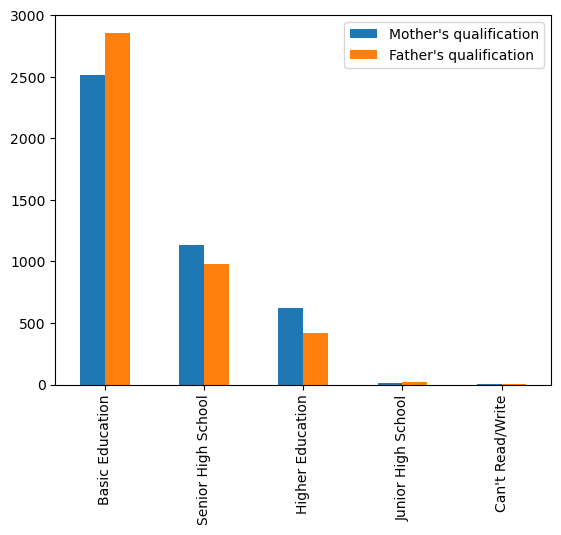

In [224]:
mother_s_qualification = data["Mother's qualification"]
father_s_qualification = data["Father's qualification"]
targets = data['Target']

data_pair = pd.concat([mother_s_qualification, father_s_qualification, targets], axis=1)

# delete unknow value (34)
data_pair.drop(data_pair[data_pair["Mother's qualification"] == 34].index, inplace=True)
data_pair.drop(data_pair[data_pair["Father's qualification"] == 34].index, inplace=True)
data_pair.reset_index(drop=True, inplace=True)

qualification_mapping = {
                            35: 0, 36: 0,
                            19: 1, 37: 1, 38: 1,
                            11: 2, 26: 2, 29: 2, 30: 2,
                            1: 3, 9: 3, 10: 3, 12: 3, 13: 3, 14: 3, 18: 3, 20: 3, 22: 3, 25: 3, 27: 3, 31: 3, 33: 3, 39: 3,
                            2: 4, 3: 4, 5: 4, 6: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4
}

stage_map = {
                0: "Can't Read/Write",
                1: 'Basic Education',
                2: 'Junior High School',
                3: 'Senior High School',
                4: 'Higher Education'
}

# replace the value with simpler rules
data_pair["Mother's qualification"] = data_pair["Mother's qualification"].replace(qualification_mapping)
data_pair["Father's qualification"] = data_pair["Father's qualification"].replace(qualification_mapping)
# count the number with a new DataFrame
mother_count = data_pair["Mother's qualification"].value_counts()
father_count = data_pair["Father's qualification"].value_counts()
data_count = pd.concat([mother_count, father_count], axis=1)

data_count.columns = ["Mother's qualification", "Father's qualification"]
data_count.index = data_count.index.map(stage_map)

print(data_count)
plot = data_count.plot(kind='bar')

Here we can see that most people only have basic education and there are more fathers in this stage.
But in other stages, there are more mothers.

Target                  Dropout  Enrolled  Graduate
Parent's qualification                             
0                           3.0       NaN       NaN
1                         673.0     374.0    1120.0
2                           5.0       1.0      10.0
3                         391.0     230.0     685.0
4                         246.0     186.0     358.0


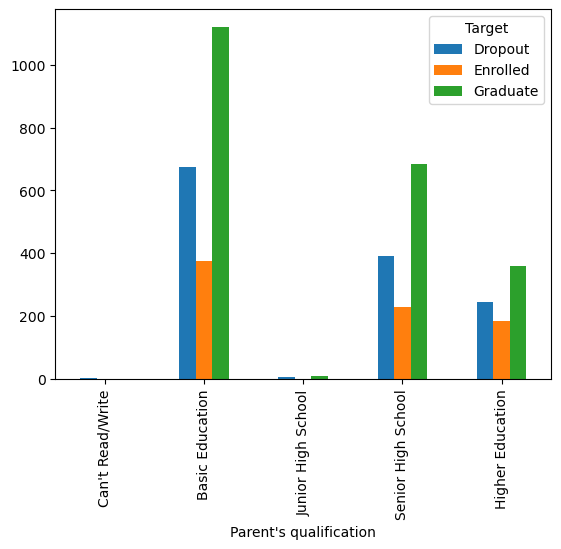

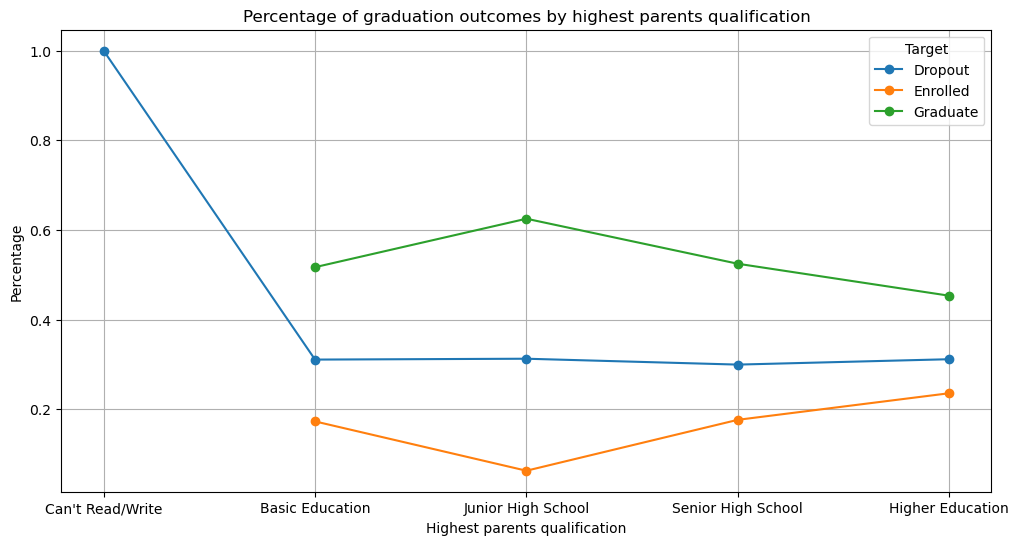

In [225]:
import matplotlib.pyplot as plt

# bar plot
data_pair["Parent's qualification"] = data_pair[["Mother's qualification", "Father's qualification"]].max(axis=1)

grouped_data = data_pair.groupby(["Parent's qualification", 'Target']).size().unstack()
print(grouped_data)

plot = grouped_data.plot(kind='bar')
plt.xticks(grouped_data.index, stage_map.values())

# line chart of percentage
grouped_data = data_pair.groupby(["Parent's qualification", 'Target']).size().unstack()
grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))

for target in grouped_percentage.columns:
    plt.plot(grouped_percentage.index, grouped_percentage[target], marker='o', label=target)

plt.title('Percentage of graduation outcomes by highest parents qualification')
plt.xlabel('Highest parents qualification')
plt.ylabel('Percentage')
plt.legend(title='Target')
plt.xticks(grouped_percentage.index, stage_map.values())
plt.grid(True)

We can see that most students graduate regardless of their parent's qualification. (except for "Can't Read/Write" but there is too little data so it can be ignored) This is vary strange since it seems be a significant factor. Of course, this may be due to the size of the dataset or the bias in data collection (only from Polytechnic Institute of Portalegre, Portugal), etc.

## Result
From the above experiment, we can conclude:
1. Nearly half of students successfully graduated.
2. Graduates may have higher admission grade.
3. Most parents only have basic education.
4. Parent's qualification do not appear to affect student graduation.

But in objective 2 and 3 we can see the effect of some outliers, so this may be an important point for further research.

You can see it on [GitHub](https://github.com/HelloIamSteve/DSCP-final)
and [here](https://helloiamsteve.github.io/DSCP-final/)